# Decision Tree
A flow chart to make decisions based on the previous experience

In [2]:
import pandas as pd

age = [36, 42, 23, 52, 43, 44, 66, 35, 52, 35, 24, 18, 45]
experience = [10, 12, 4, 4, 21, 14, 3, 14, 13, 5, 3, 3, 9]
rank = [9, 4, 6, 4, 8, 5, 7, 9, 7, 9, 5, 7, 9]
nationality = ['UK', 'USA', 'N', 'USA', 'USA', 'UK', 'N', 'UK', 'N', 'N', 'USA', 'UK', 'UK']
go = ['NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES']

# Create the DataFrame
df = pd.DataFrame({
    'Age': age,
    'Experience': experience,
    'Rank': rank,
    'Nationality': nationality,
    'Go': go
})

print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [3]:
#for decision tree convert non numerical values into a numerical value
d = {'UK': 0, 'USA': 1, 'N': 2}

df["Nationality"] = df["Nationality"].map(d)

d = {'YES': 1, 'NO': 0}

df['Go'] = df["Go"].map(d)

print(df)


    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [4]:
X = df[['Age', 'Experience', 'Rank', 'Nationality']]
y = df['Go']

print(X)
print("\n"*4)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0





0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

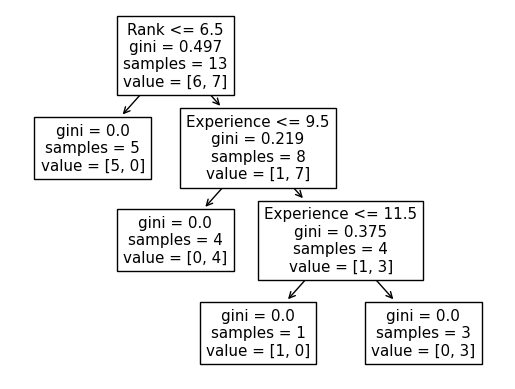

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=['Age', 'Experience', 'Rank', 'Nationality'])

In [6]:
# predict the decision tree for a 
# 40 year old 
# American Comedian
# 10 years of experience
# comedy ranking of 7

print(dtree.predict([[40, 10, 7, 1]]))

[0]


/Users/amansingh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [12]:
# if age = 71


print(dtree.predict([[71, 3, 7, 1]]))

[1]


/Users/amansingh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
